In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

In [9]:
df=pd.read_csv("C:\XYZ\Disease prediction\CVD_cleaned.csv")

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
C:\Users\hp\AppData\Local\Temp\ipykernel_27244\2184103594.py:1: SyntaxWarning: invalid escape sequence '\X'
  df=pd.read_csv("C:\XYZ\Disease prediction\CVD_cleaned.csv")


In [10]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [11]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [12]:
df.describe

<bound method NDFrame.describe of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [14]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [15]:
df.corr()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.027445,0.036887,-0.020645,0.020874,0.004457,0.002294,-0.025172,0.014010,-0.013757,0.032383,0.001602,0.014858,0.013979,0.004299,0.023656,-0.010947,-0.021550,-0.000668
Checkup,0.027445,1.000000,-0.029750,0.083480,0.079285,0.086747,0.035632,0.127812,0.150166,-0.100058,0.223067,-0.088958,0.012007,0.060868,-0.010145,-0.046676,0.039310,0.034934,-0.055723
Exercise,0.036887,-0.029750,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.136618,-0.124813,0.059344,-0.122345,0.091618,-0.090144,-0.155756,-0.093295,0.094959,0.136787,0.125002,-0.036930
Heart_Disease,-0.020645,0.083480,-0.096347,1.000000,0.090848,0.092387,0.032526,0.166241,0.153913,0.072595,0.229011,0.015780,0.045875,0.042666,0.107797,-0.036569,-0.020055,-0.024043,-0.009227
Skin_Cancer,0.020874,0.079285,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.032968,0.136178,0.009678,0.272074,0.006812,-0.028954,-0.037619,0.032828,0.042764,0.024123,0.012871,-0.038919
Other_Cancer,0.004457,0.086747,-0.054388,0.092387,0.150824,1.000000,0.015892,0.063898,0.129362,-0.042044,0.234459,-0.043459,-0.021132,0.001047,0.053431,-0.008663,0.007974,-0.003237,-0.033298
Depression,0.002294,0.035632,-0.084729,0.032526,-0.013014,0.015892,1.000000,0.053155,0.121598,-0.141450,-0.103169,-0.091318,0.047936,0.109597,0.100275,-0.028135,-0.039943,-0.051170,0.018138
Diabetes,-0.025172,0.127812,-0.136618,0.166241,0.032968,0.063898,0.053155,1.000000,0.133890,-0.013143,0.192792,-0.043098,0.158219,0.205326,0.053780,-0.114190,-0.019099,-0.027347,-0.004252
Arthritis,0.014010,0.150166,-0.124813,0.153913,0.136178,0.129362,0.121598,0.133890,1.000000,-0.100053,0.370997,-0.097789,0.074104,0.137964,0.123196,-0.024896,-0.002012,-0.018825,-0.050961
Sex,-0.013757,-0.100058,0.059344,0.072595,0.009678,-0.042044,-0.141450,-0.013143,-0.100053,1.000000,-0.060232,0.698167,0.354019,0.010989,0.073402,0.129291,-0.092462,-0.069179,0.130052


In [16]:
x=df.drop('Diabetes', axis=1)
y=df['Diabetes']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size=0.2 , random_state=123)
model = LogisticRegression()
model.fit(xtrain, ytrain)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred=model.predict(xtest)
print(y_pred)

[0 0 0 ... 0 2 0]


In [19]:
acc=accuracy_score(ytest,y_pred)
print(acc)

0.8403943598128572


In [21]:
print(confusion_matrix(ytest,y_pred))

[[51285     0   606    10]
 [ 1310     0    67     0]
 [ 7336     0   625     4]
 [  523     0     3     2]]


In [22]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     51901
           1       0.00      0.00      0.00      1377
           2       0.48      0.08      0.13      7965
           3       0.12      0.00      0.01       528

    accuracy                           0.84     61771
   macro avg       0.36      0.27      0.26     61771
weighted avg       0.78      0.84      0.78     61771



c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Confusion Matrix:
 [[51285     0   606    10]
 [ 1310     0    67     0]
 [ 7336     0   625     4]
 [  523     0     3     2]]


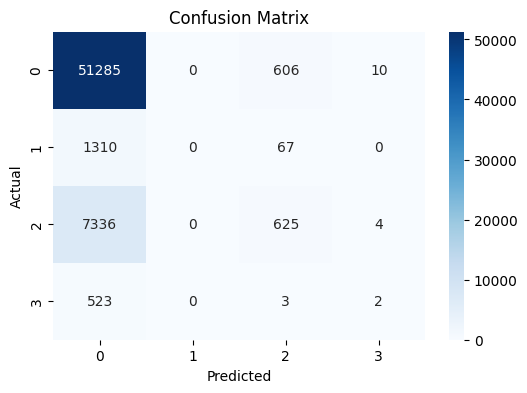

In [23]:
# Confusion Matrix
# ------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 